In [2]:
import  pandas as pd 
df = pd.read_csv('C:\\Users\\user\\Documents\\DataScience\\PYTHON\\tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
df[df['total_bill']==df['total_bill'].max()]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


In [5]:
%matplotlib inline

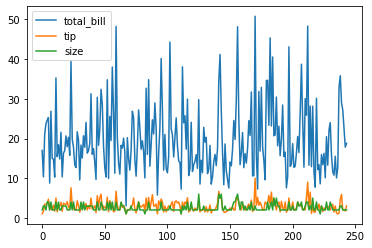

In [6]:
df.plot()

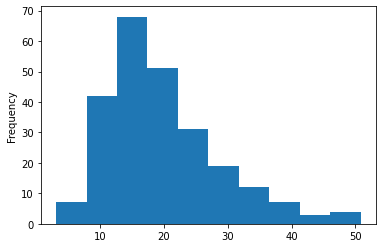

In [7]:
df['total_bill'].plot(kind = 'hist')

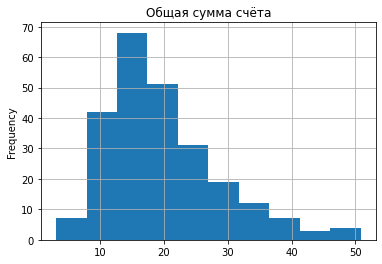

In [8]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

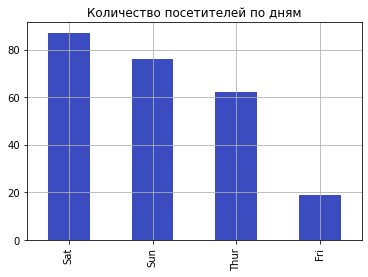

In [9]:
df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество посетителей по дням')

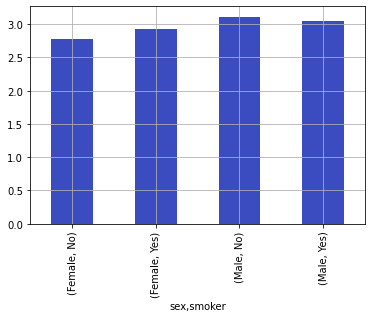

In [10]:
#10.2.1
df.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True,colormap = 'coolwarm',) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000F8FEA118C8>,
      dtype=object)

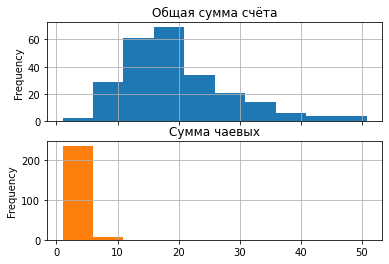

In [11]:
#10.3
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

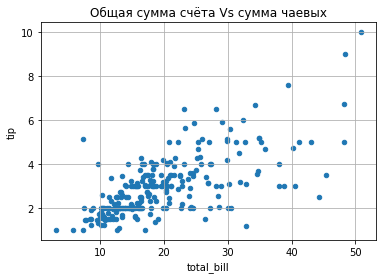

In [12]:
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

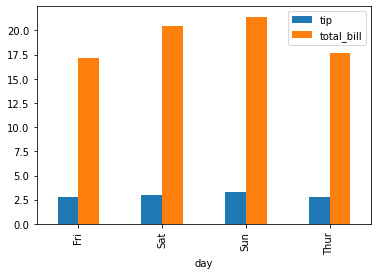

In [13]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

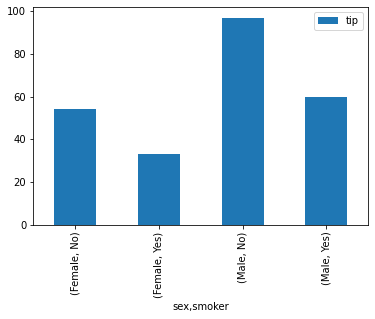

In [14]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

In [15]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count')

tip
sex    smoker     
Female No       54
       Yes      33
Male   No       97
       Yes      60

In [16]:
#10.3.1
Распределение клиентов ресторана по полу и отношению к курению. 

SyntaxError: invalid syntax (<ipython-input-16-df66fb398009>, line 2)

In [ ]:
df.groupby('smoker')['tip'].count().plot(kind = 'bar') 

In [17]:
#10.4
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

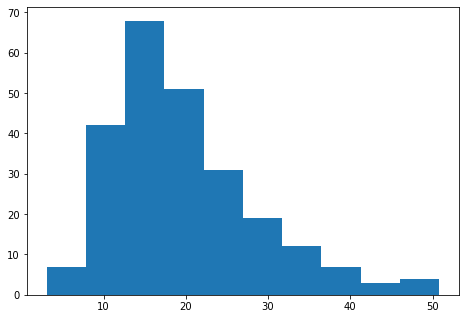

In [18]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

Text(0.5, 0, 'Сумма заказа, USD')

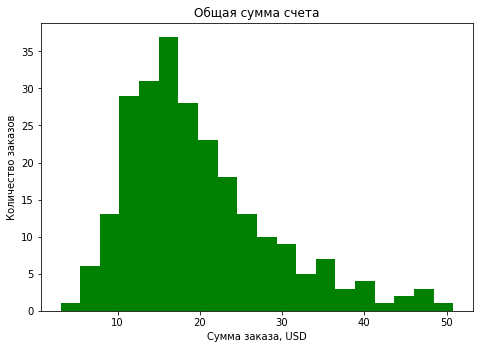

In [19]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

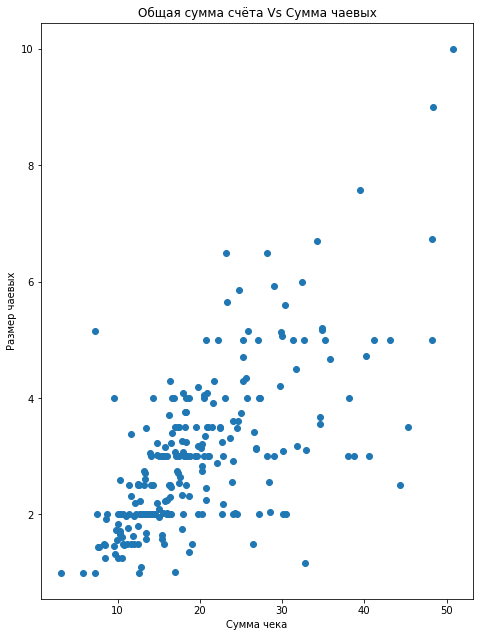

In [20]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1,2]) 
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')
axes.marker = 3

In [21]:
df.value_counts(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [22]:
tips_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

In [23]:
tips_per_day.head()

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


<BarContainer object of 4 artists>

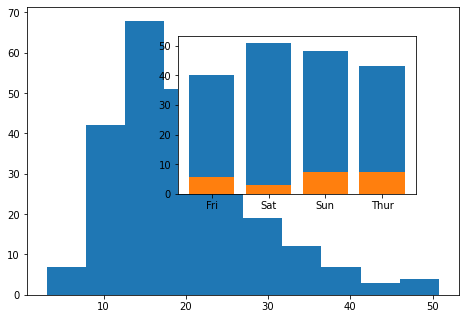

In [24]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1]  )
main_axes.hist(df['total_bill'])
fuck_axes = fig.add_axes([0.35, 0.35, 0.55, 0.55])
fuck_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'])
fuck_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'])

<BarContainer object of 4 artists>

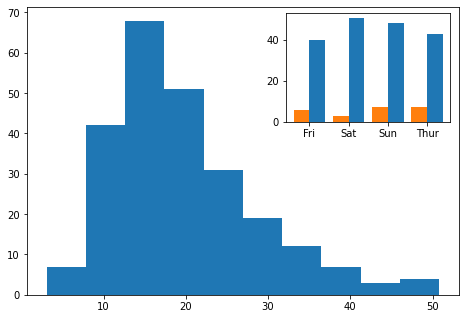

In [25]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.4, align = 'edge')

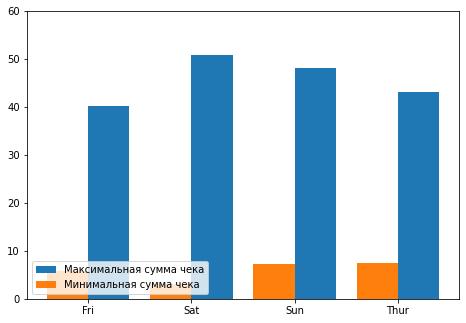

In [26]:
#10.6
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0,60)
axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.4, align = 'edge',label = 'Минимальная сумма чека')
axes.legend(loc=3)

(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

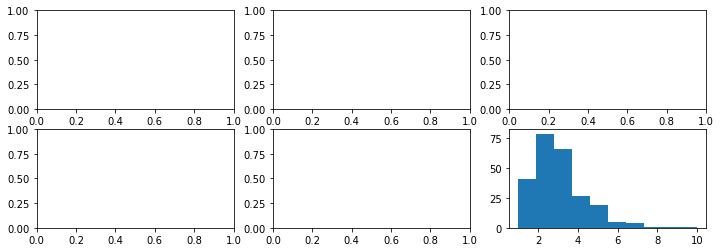

In [27]:
fig, axes = plt.subplots(2,3, figsize=(12,4))
axes[1][2].hist(df['tip']) 

In [28]:
axes[1][2].hist(df['tip']) 

(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

In [29]:
import numpy as np 

In [30]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

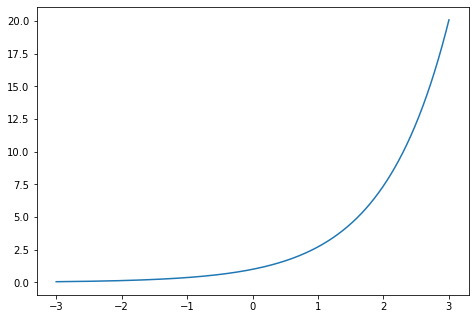

In [31]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1) 

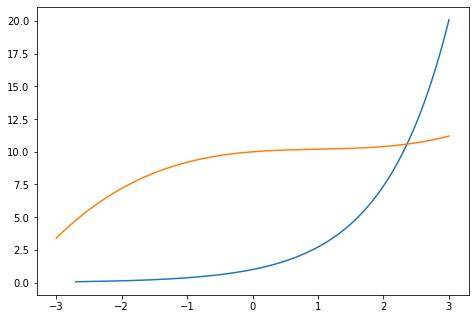

In [32]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])

axes.plot(x[50:], y1[50:]) 
axes.plot(x, y2)

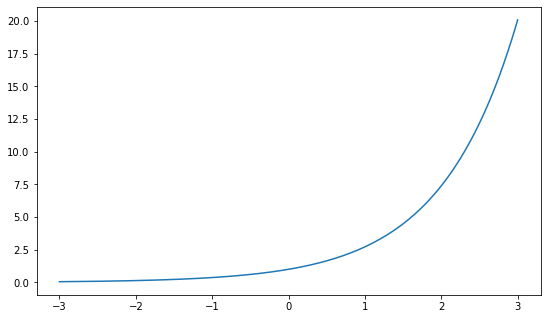

In [33]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='-')

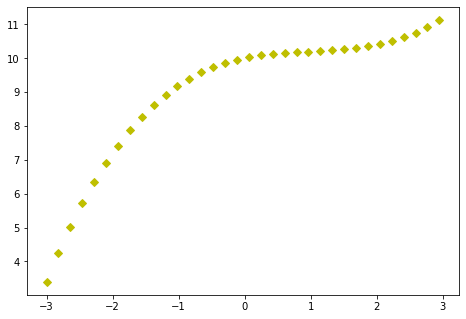

In [34]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'yD')

ValueError: x and y must have same first dimension, but have shapes (300,) and (700,)

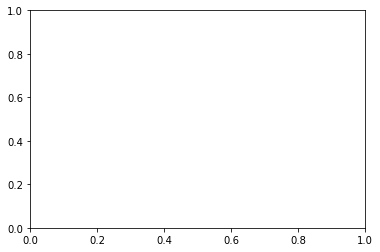

In [35]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)
plt.plot(x[:300], y1[:700]) 

In [36]:
#10.9
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
import warnings; warnings.simplefilter('ignore')

In [38]:
df = pd.read_csv('C:\\Users\\user\\Documents\\DataScience\\PYTHON\\tips.csv')

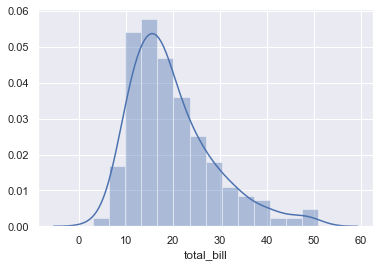

In [39]:
sns.set()
sns.distplot(df['total_bill'])

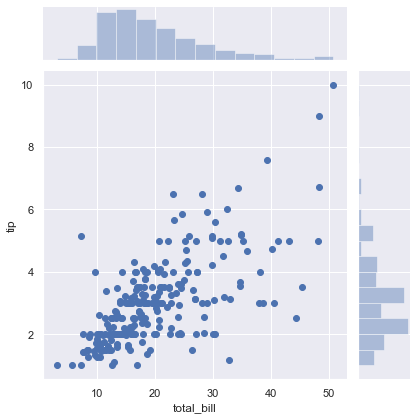

In [40]:
sns.jointplot(x='total_bill',y='tip',data =df)

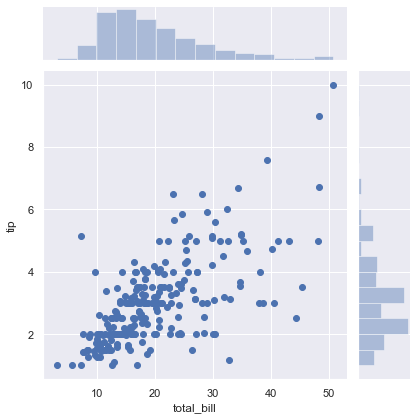

In [41]:
sns.jointplot(x=df['total_bill'],y=df['tip'],data =df)

In [ ]:
sns.jointplot(x=df['total_bill'],y=df['tip'],data =df,kind = 'kde')

In [ ]:
sns.pairplot(df)
sns.set(style="ticks")

In [ ]:
#10.10
sns.countplot(x='day',y='sex',data=df)

In [ ]:
sns.barplot(x='sex',y='total_bill',data=df)

In [ ]:
sns.boxplot(x='day',y='tip',data=df)

In [ ]:
sns.boxplot(x='day',y='tip',data=df,hue='smoker')

In [ ]:
sns.pairplot(df, hue = 'smoker')

In [ ]:
#10.11
correlation = df.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [ ]:
!pip install plotly

In [ ]:
!pip install cufflinks

In [ ]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [ ]:
init_notebook_mode(connected = True)
cf.go_offline()

In [ ]:
df.iplot()

In [ ]:
df.groupby(by = 'day')['total_bill'].agg(['min','max']).plot() 